In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('iris1.csv')
data.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [166]:
print(data.shape)
print(data.info())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


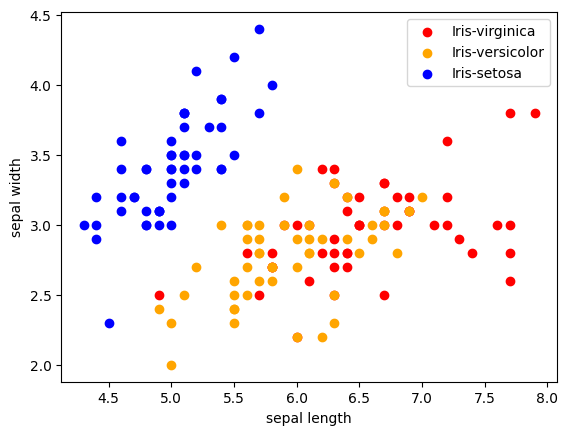

In [152]:
# scatter plot
colors=['red' , 'orange', 'blue']
species=['Iris-virginica','Iris-versicolor' ,'Iris-setosa']

for i in range(3):
    x=data[data['class'] ==species[i]]
    plt.scatter(x['sepal_len'], x['sepal_wid'] , c=colors[i] , label= species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

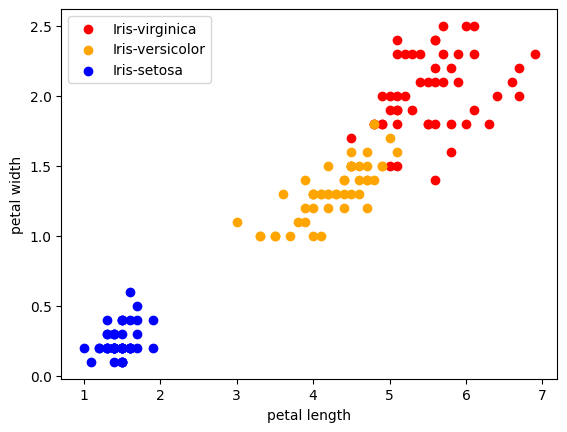

In [144]:
# scatter plot
colors=['red' , 'orange', 'blue']
species=['Iris-virginica','Iris-versicolor' ,'Iris-setosa']

for i in range(3):
    x=data[data['class'] ==species[i]]
    plt.scatter(x['petal_len'], x['petal_wid'] , c=colors[i] , label= species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

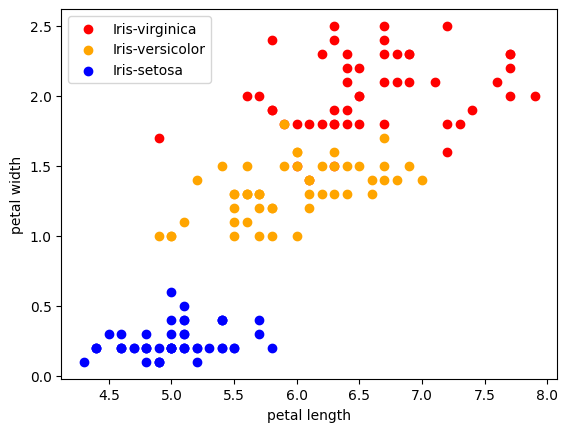

In [131]:
# scatter plot
colors=['red' , 'orange', 'blue']
species=['Iris-virginica','Iris-versicolor' ,'Iris-setosa']

for i in range(3):
    x=data[data['class'] ==species[i]]
    plt.scatter(x['sepal_len'], x['petal_wid'] , c=colors[i] , label= species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

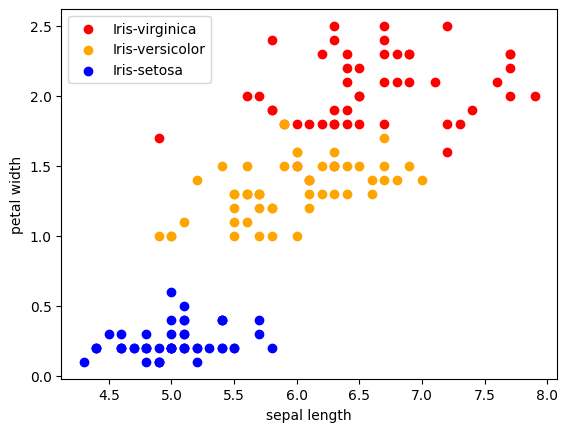

In [132]:
# scatter plot
colors=['red' , 'orange', 'blue']
species=['Iris-virginica','Iris-versicolor' ,'Iris-setosa']

for i in range(3):
    x=data[data['class'] ==species[i]]
    plt.scatter(x['sepal_len'], x['petal_wid'] , c=colors[i] , label= species[i])
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend()

In [133]:
y = data['class']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


Naive Bayes Results:
Accuracy: 0.93, Precision: 1.00, Recall: 0.93, F1 Score: 0.97


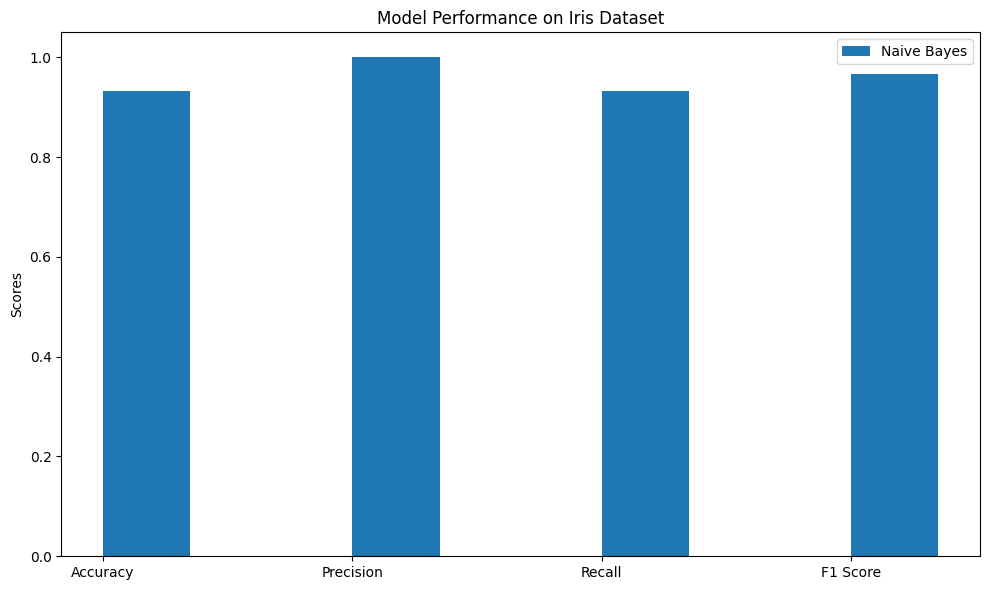

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Load datas
columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

# Step 2: Encode labels
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['class'] = data['class'].map(label_map)

# Step 3: Feature and target selection
features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
x = data[features].values
y = data['class'].values

# Step 4: Train-test split (80-20)
split = int(0.8 * len(data))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Step 6: Manual Naive Bayes (Gaussian)
def gaussian_prob(x, mean, std):
    eps = 1e-6
    return (1.0 / (np.sqrt(2 * np.pi) * (std + eps))) * np.exp(- ((x - mean) ** 2) / (2 * (std + eps) ** 2))

def naive_bayes_predict(x_train, y_train, x_test):
    labels = np.unique(y_train)
    means = {}
    stds = {}
    priors = {}

    for label in labels:
        x_l = x_train[y_train == label]
        means[label] = x_l.mean(axis=0)
        stds[label] = x_l.std(axis=0)
        priors[label] = len(x_l) / len(x_train)

    predictions = []
    for x in x_test:
        probs = {}
        for label in labels:
            prob = np.log(priors[label])
            for i in range(len(x)):
                prob += np.log(gaussian_prob(x[i], means[label][i], stds[label][i]))
            probs[label] = prob
        predicted = max(probs, key=probs.get)
        predictions.append(predicted)
    return predictions

y_pred_nb = naive_bayes_predict(x_train, y_train, x_test)

#  Metrics Calculation
def evaluate(y_true, y_pred):
    accuracy = sum(y1 == y2 for y1, y2 in zip(y_true, y_pred)) / len(y_true)
    
    precision_list, recall_list, f1_list = [], [], []
    labels = np.unique(y_true)

    for label in labels:
        TP = sum((y_true[i] == label and y_pred[i] == label) for i in range(len(y_true)))
        FP = sum((y_true[i] != label and y_pred[i] == label) for i in range(len(y_true)))
        FN = sum((y_true[i] == label and y_pred[i] != label) for i in range(len(y_true)))
        
        precision = TP / (TP + FP + 1e-6)
        recall = TP / (TP + FN + 1e-6)
        f1 = 2 * precision * recall / (precision + recall + 1e-6)
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    precision = np.mean(precision_list)
    recall = np.mean(recall_list)
    f1 = np.mean(f1_list)

    return accuracy, precision, recall, f1

acc_nb, pre_nb, rec_nb, f1_nb = evaluate(y_test, y_pred_nb)

print("\nNaive Bayes Results:")
print(f"Accuracy: {acc_nb:.2f}, Precision: {pre_nb:.2f}, Recall: {rec_nb:.2f}, F1 Score: {f1_nb:.2f}")

# Step 10: Visualization
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [acc_nb, pre_nb, rec_nb, f1_nb]
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(6, 6))
plt.bar(x + width/2, nb_scores, width, label='Naive Bayes')
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('Model Performance on Iris Dataset')
plt.legend()
plt.tight_layout()
plt.show()
